In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imadeddineabid","key":"828da3efb51e680470e13638d9285fa7"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store -p /content/data
!unzip /content/data/ecommerce-behavior-data-from-multi-category-store.zip -d /content/data


Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
 99% 4.25G/4.29G [01:35<00:01, 28.4MB/s]
100% 4.29G/4.29G [01:35<00:00, 48.0MB/s]
Archive:  /content/data/ecommerce-behavior-data-from-multi-category-store.zip
  inflating: /content/data/2019-Nov.csv  
  inflating: /content/data/2019-Oct.csv  


In [5]:
DATA_DIR = "/content/data"


In [6]:
import os, pandas as pd

DATA_DIR = "/content/data"
csv_files = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR) if f.endswith(".csv")]
print("الملفات الموجودة:", csv_files)

sample = pd.read_csv(csv_files[0], nrows=5)
print("أعمدة البيانات:")
print(sample.columns.tolist())
sample.head()


الملفات الموجودة: ['/content/data/2019-Nov.csv', '/content/data/2019-Oct.csv']
أعمدة البيانات:
['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


🔹 الخطوة 2: تحميل البيانات الضخمة على دفعات (chunks) لتجنّب نفاد الذاكرة

In [7]:
import pandas as pd
import gc
from collections import Counter
import time

file_path = "/content/data/2019-Oct.csv"

chunksize = 500_00
event_counter = Counter()
start = time.time()

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    event_counter.update(chunk["event_type"].values)
    del chunk
    gc.collect()

end = time.time()
print("أكثر الأحداث تكراراً:")
print(event_counter.most_common())
print(f"الوقت المستغرق: {end - start:.2f} ثانية")


أكثر الأحداث تكراراً:
[('view', 40779399), ('cart', 926516), ('purchase', 742849)]
الوقت المستغرق: 192.16 ثانية


In [8]:
total_rows = 0
file_path = "/content/data/2019-Oct.csv"
chunksize = 500_00

reader = pd.read_csv(file_path, chunksize=chunksize, low_memory=False)

for i, chunk in enumerate(reader):
    print(f"✅ تمت قراءة الجزء رقم {i+1}, شكله {chunk.shape}")
    total_rows += len(chunk)
    print(f"📦 مجموع الصفوف المقروءة: {total_rows}")

✅ تمت قراءة الجزء رقم 1, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 50000
✅ تمت قراءة الجزء رقم 2, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 100000
✅ تمت قراءة الجزء رقم 3, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 150000
✅ تمت قراءة الجزء رقم 4, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 200000
✅ تمت قراءة الجزء رقم 5, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 250000
✅ تمت قراءة الجزء رقم 6, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 300000
✅ تمت قراءة الجزء رقم 7, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 350000
✅ تمت قراءة الجزء رقم 8, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 400000
✅ تمت قراءة الجزء رقم 9, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 450000
✅ تمت قراءة الجزء رقم 10, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 500000
✅ تمت قراءة الجزء رقم 11, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 550000
✅ تمت قراءة الجزء رقم 12, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 600000
✅ تمت قراءة الجزء رقم 13, شكله (50000, 9)
📦 مجموع الصفوف المقروءة: 650000
✅ تمت قراءة الجزء رقم 14, شكله (50000, 9)
📦 مجمو

# الخطوة 3: تحليل بسيط — أكثر العلامات التجارية (brands) تكراراً لكل نوع حدث

In [9]:
import pandas as pd
import gc
from collections import Counter

file_path = "/content/data/2019-Oct.csv"
chunksize = 500_000

result = {}

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    for event_type, df_group in chunk.groupby("event_type"):
        top_brands = (
            df_group["brand"].value_counts().head(3).to_dict()
        )
        if event_type not in result:
            result[event_type] = Counter()
        result[event_type].update(top_brands)
    del chunk
    gc.collect()

for event_type, brands in result.items():
    print(f"\nالحدث: {event_type}")
    print("أشهر العلامات التجارية:", dict(brands.most_common(5)))


الحدث: cart
أشهر العلامات التجارية: {'samsung': 303249, 'apple': 209084, 'xiaomi': 104497}

الحدث: purchase
أشهر العلامات التجارية: {'samsung': 172896, 'apple': 142873, 'xiaomi': 56616}

الحدث: view
أشهر العلامات التجارية: {'samsung': 4806630, 'apple': 3770597, 'xiaomi': 2922650}


# الخطوة 4: تحويل البيانات إلى Parquet (اختياري  لتسريع التحليل )

In [10]:
import pandas as pd
import glob
import time

start = time.time()

all_files = glob.glob("/content/data/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df.to_parquet("/content/data/parquet_data.parquet", engine="pyarrow", compression="snappy")

end = time.time()
print(f" التحويل إلى Parquet في {end - start:.1f} ثانية.")


تم التحويل إلى Parquet في 176.7 ثانية.


#  الخطوة 5: تحليل باستخدام Dask (على جميع الملفات دفعة واحدة)

In [11]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

ddf = dd.read_csv("/content/data/*.csv", assume_missing=True, blocksize="64MB")
print("أسماء الأعمدة:", list(ddf.columns))

with ProgressBar():
    event_counts = ddf["event_type"].value_counts().compute()

print("\nعدد الأحداث:")
print(event_counts)

with ProgressBar():
    avg_price = ddf.groupby("event_type")["price"].mean().compute()

print("\nمتوسط السعر لكل نوع حدث:")
print(avg_price)


أسماء الأعمدة: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']
[########################################] | 100% Completed | 98.62 s

عدد الأحداث:
event_type
view        40779399
cart          926516
purchase      742849
Name: count, dtype: int64[pyarrow]
[########################################] | 100% Completed | 92.57 s

متوسط السعر لكل نوع حدث:
event_type
purchase    309.561569
cart        333.829992
view        288.984745
Name: price, dtype: float64


# 1. توزيع الأحداث على مدار اليوم (سلوك المستخدم)

[########################################] | 100% Completed | 64.11 s


<Axes: title={'center': 'توزيع الأحداث حسب الساعة (view/cart/purchase)'}, xlabel='hour'>

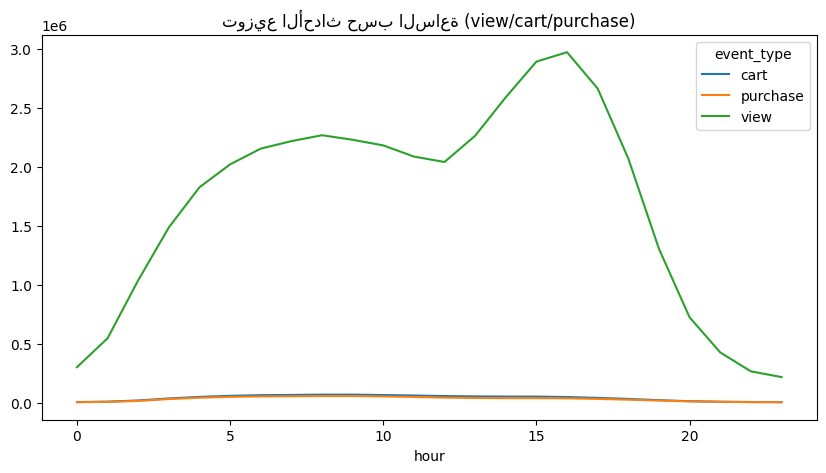

In [13]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

ddf = dd.read_parquet("/content/data/parquet_data.parquet")

ddf["event_time"] = dd.to_datetime(ddf["event_time"], errors="coerce")
ddf["hour"] = ddf["event_time"].dt.hour

with ProgressBar():
    hourly = ddf.groupby("hour")["event_type"].value_counts().compute().unstack(fill_value=0)

hourly.plot(kind="line", figsize=(10,5), title="توزيع الأحداث حسب الساعة (view/cart/purchase)")


# 2. مقارنة الأسعار بين العلامات التجارية في المشتريات فقط

In [14]:
import pandas as pd

with ProgressBar():
    purchase_df = ddf[ddf["event_type"] == "purchase"]
    brand_avg_price = purchase_df.groupby("brand")["price"].mean().compute().sort_values(ascending=False).head(10)

print("أغلى 10 علامات تجارية في المشتريات:")
print(brand_avg_price)


[########################################] | 100% Completed | 5.39 s
أغلى 10 علامات تجارية في المشتريات:
brand
rado             2069.550000
minimotors       2033.510000
shua             2005.353333
kingsong         1992.330000
dreammachines    1801.820000
hartan           1801.820000
senci            1796.216667
longines         1773.900000
mercury          1765.636400
electro-voice    1536.622500
Name: price, dtype: float64


# 3. نسبة التحويل (Conversion Rate)
أي: كم من مشاهدات المنتجات تتحول إلى عمليات شراء؟

In [ ]:
with ProgressBar():
    views = ddf[ddf["event_type"] == "view"]["product_id"].nunique().compute()
    purchases = ddf[ddf["event_type"] == "purchase"]["product_id"].nunique().compute()

conversion_rate = (purchases / views) * 100
print(f"نسبة التحويل من مشاهدة إلى شراء: {conversion_rate:.4f}%")


# 4. تحليل العلامات التجارية الأكثر جذبًا (بناءً على معدل الشراء من المشاهدة)

In [ ]:
with ProgressBar():
    views_per_brand = ddf[ddf["event_type"] == "view"].groupby("brand")["user_id"].count().compute()
    purchases_per_brand = ddf[ddf["event_type"] == "purchase"].groupby("brand")["user_id"].count().compute()

brand_conversion = (purchases_per_brand / views_per_brand * 100).dropna().sort_values(ascending=False).head(10)
print("أكثر العلامات التجارية من حيث معدل التحويل:")
print(brand_conversion)


CSV

In [15]:
import os
import dask.dataframe as dd
import pandas as pd
from dask.diagnostics import ProgressBar


DATA_PARQUET = "/content/data/parquet_data.parquet"
RESULTS_DIR = "/content/results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print("جارٍ تحميل البيانات من Parquet...")
ddf = dd.read_parquet(DATA_PARQUET)




ddf["event_time"] = dd.to_datetime(ddf["event_time"], errors="coerce")






with ProgressBar():
    event_counts = ddf["event_type"].value_counts().compute()
event_counts.to_csv(f"{RESULTS_DIR}/event_counts.csv", header=["count"])
print(" event_counts.csv تم حفظه")






with ProgressBar():
    avg_price = ddf.groupby("event_type")["price"].mean().compute()
avg_price.to_csv(f"{RESULTS_DIR}/avg_price_per_event.csv", header=["avg_price"])
print(" avg_price_per_event.csv تم حفظه")





with ProgressBar():
    top_brands = (
        ddf.groupby(["event_type", "brand"])["user_id"]
        .count()
        .compute()
        .reset_index()
        .rename(columns={"user_id": "count"})
    )
top_brands = (
    top_brands.sort_values(["event_type", "count"], ascending=[True, False])
    .groupby("event_type")
    .head(10)
)
top_brands.to_csv(f"{RESULTS_DIR}/top_brands_by_event.csv", index=False)
print("✔ top_brands_by_event.csv تم حفظه")





ddf["hour"] = ddf["event_time"].dt.hour
with ProgressBar():
    hourly = ddf.groupby("hour")["event_type"].value_counts().compute().unstack(fill_value=0)
hourly.to_csv(f"{RESULTS_DIR}/hourly_event_distribution.csv")
print("✔ hourly_event_distribution.csv تم حفظه")





with ProgressBar():
    views = ddf[ddf["event_type"] == "view"]["product_id"].nunique().compute()
    purchases = ddf[ddf["event_type"] == "purchase"]["product_id"].nunique().compute()
conversion_rate = (purchases / views) * 100
pd.DataFrame(
    {"views": [views], "purchases": [purchases], "conversion_rate(%)": [conversion_rate]}
).to_csv(f"{RESULTS_DIR}/conversion_rate.csv", index=False)
print("✔ conversion_rate.csv تم حفظه")





with ProgressBar():
    views_per_brand = ddf[ddf["event_type"] == "view"].groupby("brand")["user_id"].count().compute()
    purchases_per_brand = ddf[ddf["event_type"] == "purchase"].groupby("brand")["user_id"].count().compute()

brand_conversion = (
    (purchases_per_brand / views_per_brand * 100)
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)
brand_conversion.columns = ["brand", "conversion_rate(%)"]
brand_conversion.to_csv(f"{RESULTS_DIR}/brand_conversion_rate.csv", index=False)
print(" brand_conversion_rate.csv تم حفظه")


print("\n تم إنشاء جميع ملفات النتائج في:", RESULTS_DIR)
print("المخرجات:")
for f in os.listdir(RESULTS_DIR):
    print(" -", f)


جارٍ تحميل البيانات من Parquet...
[########################################] | 100% Completed | 2.36 s
 event_counts.csv تم حفظه
[########################################] | 100% Completed | 5.14 s
 avg_price_per_event.csv تم حفظه
[########################################] | 100% Completed | 10.74 s
✔ top_brands_by_event.csv تم حفظه
[########################################] | 100% Completed | 60.24 s
✔ hourly_event_distribution.csv تم حفظه
[########################################] | 100% Completed | 5.66 s
[########################################] | 100% Completed | 4.53 s
✔ conversion_rate.csv تم حفظه
[########################################] | 100% Completed | 11.36 s
[########################################] | 100% Completed | 8.50 s
 brand_conversion_rate.csv تم حفظه

 تم إنشاء جميع ملفات النتائج في: /content/results
المخرجات:
 - hourly_event_distribution.csv
 - brand_conversion_rate.csv
 - event_counts.csv
 - avg_price_per_event.csv
 - conversion_rate.csv
 - top_brands_by_eve

# إنشاء المقارنة النهائية

 pandas + chunksize done in 188.37 s
[########################################] | 100% Completed | 93.91 s
 Dask done in 94.34 s
  (compressed) done in 134.59 s

 تم حفظ جدول المقارنة في: /content/results/methods_comparison.csv


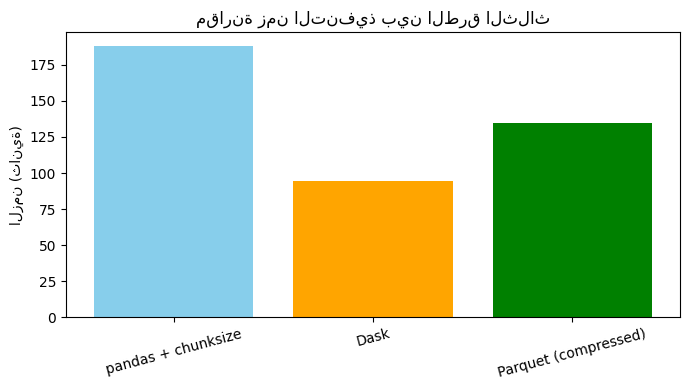

 تم حفظ الرسم البياني  في: /content/results/methods_comparison.png


,الطريقة,الزمن المستغرق (ثانية),حجم البيانات (MB)
0,pandas + chunksize,188.370910,5668.612855
1,Dask,94.335464,13129.618001
2,Parquet (compressed),134.591252,1381.886854


In [17]:
import os, time, gc, pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar

DATA_DIR = "/content/data"
RESULTS_DIR = "/content/results"
os.makedirs(RESULTS_DIR, exist_ok=True)

def dir_size(path):
    if os.path.isfile(path):
        return os.path.getsize(path)
    total = 0
    for dirpath, _, filenames in os.walk(path):
        for f in filenames:
            total += os.path.getsize(os.path.join(dirpath, f))
    return total


import pandas as pd
from collections import Counter

pandas_start = time.time()
event_counter = Counter()
chunksize = 500_00
file_path = os.path.join(DATA_DIR, "2019-Oct.csv")

for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
    event_counter.update(chunk["event_type"].values)
    del chunk
    gc.collect()

pandas_end = time.time()
pandas_time = pandas_end - pandas_start
pandas_size = dir_size(file_path)

print(f" pandas + chunksize done in {pandas_time:.2f} s")


dask_start = time.time()
with ProgressBar():
    ddf = dd.read_csv(os.path.join(DATA_DIR, "*.csv"), assume_missing=True, blocksize="64MB")
    _ = ddf["event_type"].value_counts().compute()
dask_end = time.time()
dask_time = dask_end - dask_start
dask_size = dir_size(DATA_DIR)
print(f" Dask done in {dask_time:.2f} s")


parquet_dir = os.path.join(DATA_DIR, "parquet_data_auto")
parquet_start = time.time()
ddf.to_parquet(parquet_dir, engine="pyarrow", compression="snappy", write_index=False)
parquet_end = time.time()
parquet_time = parquet_end - parquet_start
parquet_size = dir_size(parquet_dir)
print(f"  (compressed) done in {parquet_time:.2f} s")

comparison = pd.DataFrame({
    "الطريقة": ["pandas + chunksize", "Dask", "Parquet (compressed)"],
    "الزمن المستغرق (ثانية)": [pandas_time, dask_time, parquet_time],
    "حجم البيانات (MB)": [pandas_size/1e6, dask_size/1e6, parquet_size/1e6],

})

comparison.to_csv(f"{RESULTS_DIR}/methods_comparison.csv", index=False, encoding='utf-8-sig')
print("\n تم حفظ جدول المقارنة في:", f"{RESULTS_DIR}/methods_comparison.csv")


plt.figure(figsize=(7,4))
plt.bar(comparison["الطريقة"], comparison["الزمن المستغرق (ثانية)"], color=['skyblue','orange','green'])
plt.title("مقارنة زمن التنفيذ بين الطرق الثلاث")
plt.ylabel("الزمن (ثانية)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/methods_comparison.png")
plt.show()


print("   الرسم البياني  :", f"{RESULTS_DIR}/methods_comparison.png")

display(comparison)